# Advanced Certification in AIML
## A Program by IIIT-H and TalentSprint

## Learning Objectives


At the end of the experiment, you will be able to:

* Calculate the eigen values and eigen vectors
* Apply PCA using sklearn package

In [ ]:
!wget https://cdn.talentsprint.com/aiml/Experiment_related_data/Iris.csv

### Importing required packages

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Load the iris dataset

In [ ]:
iris_df = pd.read_csv("/content/Iris.csv")
iris_df.head()

,Id,sepal_length,sepal_width,petal_length,petal_width,species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


##  Mathematical calculation of eigen values and eigen vectors

Step 1:   Standardization

Step 2:   Compute the Covariance matrix

Step 3:  Compute the Eigenvalues and Eigenvectors of the Covariance matrix to identify the principal components

**Step 1:** Standardization (Scaling the data)


Standardize the range of the continuous initial variables so that each one of them contributes equally to the analysis. For instance All features are centered around 0 and have variance in the same order. If a feature has a variance that is orders of magnitude larger than others, it might dominate the objective function.

So, for each observed value of the variable, subtract the mean and divide by the standard deviation.

Standardization of datasets is a common requirement for many machine learning estimators, which is implemented in scikit-learn

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

features = iris_df.iloc[:,1:5]
scaled_data = scaler.fit_transform(features)
print(scaled_data[:10])

[[-0.90068117  1.03205722 -1.3412724  -1.31297673]
 [-1.14301691 -0.1249576  -1.3412724  -1.31297673]
 [-1.38535265  0.33784833 -1.39813811 -1.31297673]
 [-1.50652052  0.10644536 -1.2844067  -1.31297673]
 [-1.02184904  1.26346019 -1.3412724  -1.31297673]
 [-0.53717756  1.95766909 -1.17067529 -1.05003079]
 [-1.50652052  0.80065426 -1.3412724  -1.18150376]
 [-1.02184904  0.80065426 -1.2844067  -1.31297673]
 [-1.74885626 -0.35636057 -1.3412724  -1.31297673]
 [-1.14301691  0.10644536 -1.2844067  -1.4444497 ]]


In [ ]:
print(np.mean(scaled_data, axis=0))

[-4.73695157e-16 -6.63173220e-16  3.31586610e-16 -2.84217094e-16]


In [ ]:
print(np.var(scaled_data, axis=0))

[1. 1. 1. 1.]


**Step 2:** Compute the covariance matrix

Covariance is to measure how the variables of the input dataset are varying from the mean with respect to each other. 

The covariance matrix is a d × d symmetric matrix (d is the number of dimensions) where each element represents the covariance between two features

Assume $A$ is the standardized data, then Co-variance Matrix of $A$ would be, $Σ =\tfrac{A^T.A}{(n-1)} $ 

where $A^T$ = Transpose of matrix A and n is number of samples. 


In [ ]:
# Number of samples
n = scaled_data.shape[0]

# Calculate the co-variance matrix
cov_mat = (scaled_data).T.dot(scaled_data) / (n-1)

print('Covariance matrix: \n%s' %cov_mat)

Covariance matrix: 
[[ 1.00671141 -0.11010327  0.87760486  0.82344326]
 [-0.11010327  1.00671141 -0.42333835 -0.358937  ]
 [ 0.87760486 -0.42333835  1.00671141  0.96921855]
 [ 0.82344326 -0.358937    0.96921855  1.00671141]]


In Numpy, the covariance can be directly calculated using numpy cov function

In [ ]:
print('NumPy covariance matrix: \n%s' %np.cov(scaled_data.T))

NumPy covariance matrix: 
[[ 1.00671141 -0.11010327  0.87760486  0.82344326]
 [-0.11010327  1.00671141 -0.42333835 -0.358937  ]
 [ 0.87760486 -0.42333835  1.00671141  0.96921855]
 [ 0.82344326 -0.358937    0.96921855  1.00671141]]


**Step 3:** Compute the Eigenvalues and Eigenvectors

After the covariance matrix is generated, eigen decomposition is performed on the covariance matrix. Eigenvectors and Eigenvalues are found as a result of the eigen decomposition. 

Eigenvectors of a covariance matrix are actually the directions of the axes where there is a most variance (most information).

Eigenvalues are coefficients attached to each Eigenvector. Each Eigenvector has a corresponding Eigenvalue, and the sum of the Eigenvalues represents all of the variance within the entire dataset.


In [ ]:
eig_vals, eig_vecs = np.linalg.eig(cov_mat)
print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[ 0.52237162 -0.37231836 -0.72101681  0.26199559]
 [-0.26335492 -0.92555649  0.24203288 -0.12413481]
 [ 0.58125401 -0.02109478  0.14089226 -0.80115427]
 [ 0.56561105 -0.06541577  0.6338014   0.52354627]]

Eigenvalues 
[2.93035378 0.92740362 0.14834223 0.02074601]


Sort the eigen values and plot to find the variance between the eign values.


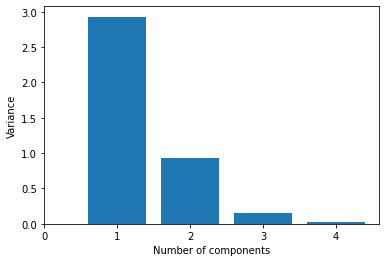

In [ ]:
# Finding the variance between the eign values
plt.bar(range(1,5),sorted(eig_vals, reverse=True)) 
plt.xticks(np.arange(0, 5, 1))
plt.xlabel('Number of components')
plt.ylabel('Variance')
plt.show()

The first two components together covering most of the information. So, third and fourth components can be dropped without losing much information.

## Applying PCA from sklearn package

For educational purposes, we went a long way in calculating principal components for Iris dataset. But sklearn provides PCA function to fit and transform the scaled data and get the variance of each component using the *explained_variance_* 

In [ ]:
from sklearn.decomposition import PCA
import numpy as np
pca = PCA()
pca_transformed = pca.fit_transform(scaled_data)

In [ ]:
pca_transformed.shape

(150, 4)

PCA function provides **explained_variance_** which gives the variance explained at each of the selected components.



In [ ]:
variance = pca.explained_variance_

Plot the variance at each component

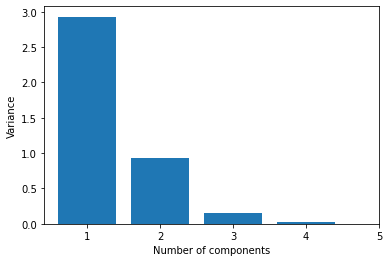

In [ ]:
plt.bar(range(1,5), variance)
plt.xticks(np.arange(1, 6, 1))
plt.xlabel('Number of components')
plt.ylabel('Variance')
plt.show()

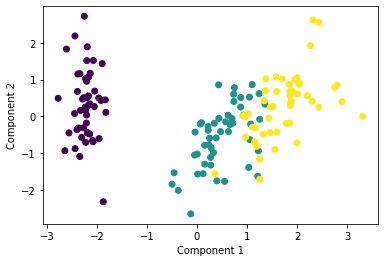

In [ ]:
# Defining labels to plot with color
label_convert = {"Iris-setosa" : 0, "Iris-versicolor" : 1,"Iris-virginica" : 2}
labels = iris_df.replace(label_convert).iloc[:,5]
# 2 dimensional data
plt.scatter(pca_transformed[:,0], pca_transformed[:,1], c=labels)
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.show()